In [2]:
import sys
sys.path.insert(1,'./lib/python3.7/site-packages')
import pandas as pd
import numpy as np
import googletrans
import matplotlib.pyplot as plt ; plt.rcdefaults()

In [4]:
df = pd.read_csv(r"/workspaces/Data_Science_Internship/Datasets/amazon.csv", encoding="ISO-8859-1", thousands='.')


In [5]:
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01


In [6]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1998-01-01
1,1999,Acre,Janeiro,0,1999-01-01
2,2000,Acre,Janeiro,0,2000-01-01
3,2001,Acre,Janeiro,0,2001-01-01
4,2002,Acre,Janeiro,0,2002-01-01


In [7]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128,2012-01-01
6450,2013,Tocantins,Dezembro,85,2013-01-01
6451,2014,Tocantins,Dezembro,223,2014-01-01
6452,2015,Tocantins,Dezembro,373,2015-01-01
6453,2016,Tocantins,Dezembro,119,2016-01-01


In [8]:
df.shape

(6454, 5)

In [9]:
df.sample(15)

,year,state,month,number,date
6403,2006,Tocantins,Outubro,1176,2006-01-01
4930,2007,Rio,Agosto,258,2007-01-01
5411,2010,Roraima,Agosto,3,2010-01-01
3570,2001,Paraiba,Dezembro,70,2001-01-01
2074,1999,Goias,Setembro,1898,1999-01-01
5203,2001,Rondonia,Outubro,796,2001-01-01
5740,2001,Sao Paulo,Janeiro,26,2001-01-01
2224,2010,Maranhao,Abril,128,2010-01-01
4374,2009,Rio,Abril,1,2009-01-01
5083,2001,Rondonia,Abril,0,2001-01-01


In [10]:
df.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,1998-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [11]:
df.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [12]:
df=df.replace(0,np.nan)

In [13]:
df2=df.dropna(subset=['number'])

In [14]:
df2.shape

(5837, 5)

In [15]:
df2.describe(include='all')

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [16]:
forest_fire_per_month = df2.groupby('month')['number'].sum()

In [17]:
forest_fire_per_month

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Março          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64

In [18]:
months_unique = list(df.month.unique())

In [19]:
months_unique

['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [20]:
forest_fire_per_month = forest_fire_per_month.reindex(months_unique,axis=0)

In [21]:
forest_fire_per_month

month
Janeiro        52587.0
Fevereiro      30952.0
Março          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64

In [22]:
print(forest_fire_per_month)

month
Janeiro        52587.0
Fevereiro      30952.0
Março          35118.0
Abril          28364.0
Maio           46083.0
Junho         111405.0
Julho         217620.0
Agosto        740841.0
Setembro     1015925.0
Outubro       629665.0
Novembro      312326.0
Dezembro      152596.0
Name: number, dtype: float64


In [23]:
forest_fire_per_month=forest_fire_per_month.to_frame()

In [24]:
forest_fire_per_month

,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Março,35118.0
Abril,28364.0
Maio,46083.0
Junho,111405.0
Julho,217620.0
Agosto,740841.0
Setembro,1015925.0


In [25]:
forest_fire_per_month.reset_index(level=0,inplace=True)

In [26]:
forest_fire_per_month

,month,number
0,Janeiro,52587.0
1,Fevereiro,30952.0
2,Março,35118.0
3,Abril,28364.0
4,Maio,46083.0
5,Junho,111405.0
6,Julho,217620.0
7,Agosto,740841.0
8,Setembro,1015925.0
9,Outubro,629665.0


In [27]:
translator = googletrans.Translator()

for months in months_unique:
    detected=translator.detect(months)
    translated = translator.translate(months)
    print(detected)
    print(translated)
    print("...")

<coroutine object Translator.detect at 0x77373dfeb9c0>
<coroutine object Translator.translate at 0x77373e662440>
...
<coroutine object Translator.detect at 0x77373dfebb00>
<coroutine object Translator.translate at 0x77373dfe2440>
...
<coroutine object Translator.detect at 0x77373dfebc40>
<coroutine object Translator.translate at 0x77373e662440>
...
<coroutine object Translator.detect at 0x77373dfebb00>
<coroutine object Translator.translate at 0x77373dfe2440>
...
<coroutine object Translator.detect at 0x77373dfebc40>
<coroutine object Translator.translate at 0x77373e662440>
...
<coroutine object Translator.detect at 0x77373dfebb00>
<coroutine object Translator.translate at 0x77373dfe2440>
...
<coroutine object Translator.detect at 0x77373dfebc40>
<coroutine object Translator.translate at 0x77373e662440>
...
<coroutine object Translator.detect at 0x77373dfebb00>
<coroutine object Translator.translate at 0x77373dfe2440>
...
<coroutine object Translator.detect at 0x77373dfebc40>
<coroutin

/tmp/ipykernel_7480/3607346117.py:4: RuntimeWarning: coroutine 'Translator.detect' was never awaited
  detected=translator.detect(months)
/tmp/ipykernel_7480/3607346117.py:5: RuntimeWarning: coroutine 'Translator.translate' was never awaited
  translated = translator.translate(months)


In [28]:
pip install googletrans==4.0.0-rc1


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17454 sha256=8a8847c2ca0892b3c7d3f4d25c7d8732d625ee1a5e6eb6d70e0ed1d0cd054693
  Stored in directory: /home/codespace/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperframe-6.1.0:
      Successfully uninstalled hyperframe-6.1.0
  Attempting uninstall: hpack
    Found existing installation: hpack 4.1.0
    Uninstalling hpack-4.1.0:
      Successfully uninstalled hpack-4.1.0
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Successfully uninstalled h11-0.14.0
  Attempting unins

In [29]:
!pip install deep-translator



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [30]:
from deep_translator import GoogleTranslator

translator = GoogleTranslator(source='auto', target='en')

for i, m in enumerate(forest_fire_per_month['month']):
    try:
        month1 = translator.translate(m)
        forest_fire_per_month.at[i, 'month'] = month1
    except Exception as e:
        print(f"Error translating '{m}': {e}")


In [31]:
forest_fire_per_month

,month,number
0,January,52587.0
1,February,30952.0
2,March,35118.0
3,April,28364.0
4,May,46083.0
5,June,111405.0
6,July,217620.0
7,August,740841.0
8,September,1015925.0
9,October,629665.0


In [32]:
print(forest_fire_per_month)

        month     number
0     January    52587.0
1    February    30952.0
2       March    35118.0
3       April    28364.0
4         May    46083.0
5        June   111405.0
6        July   217620.0
7      August   740841.0
8   September  1015925.0
9     October   629665.0
10   November   312326.0
11   December   152596.0


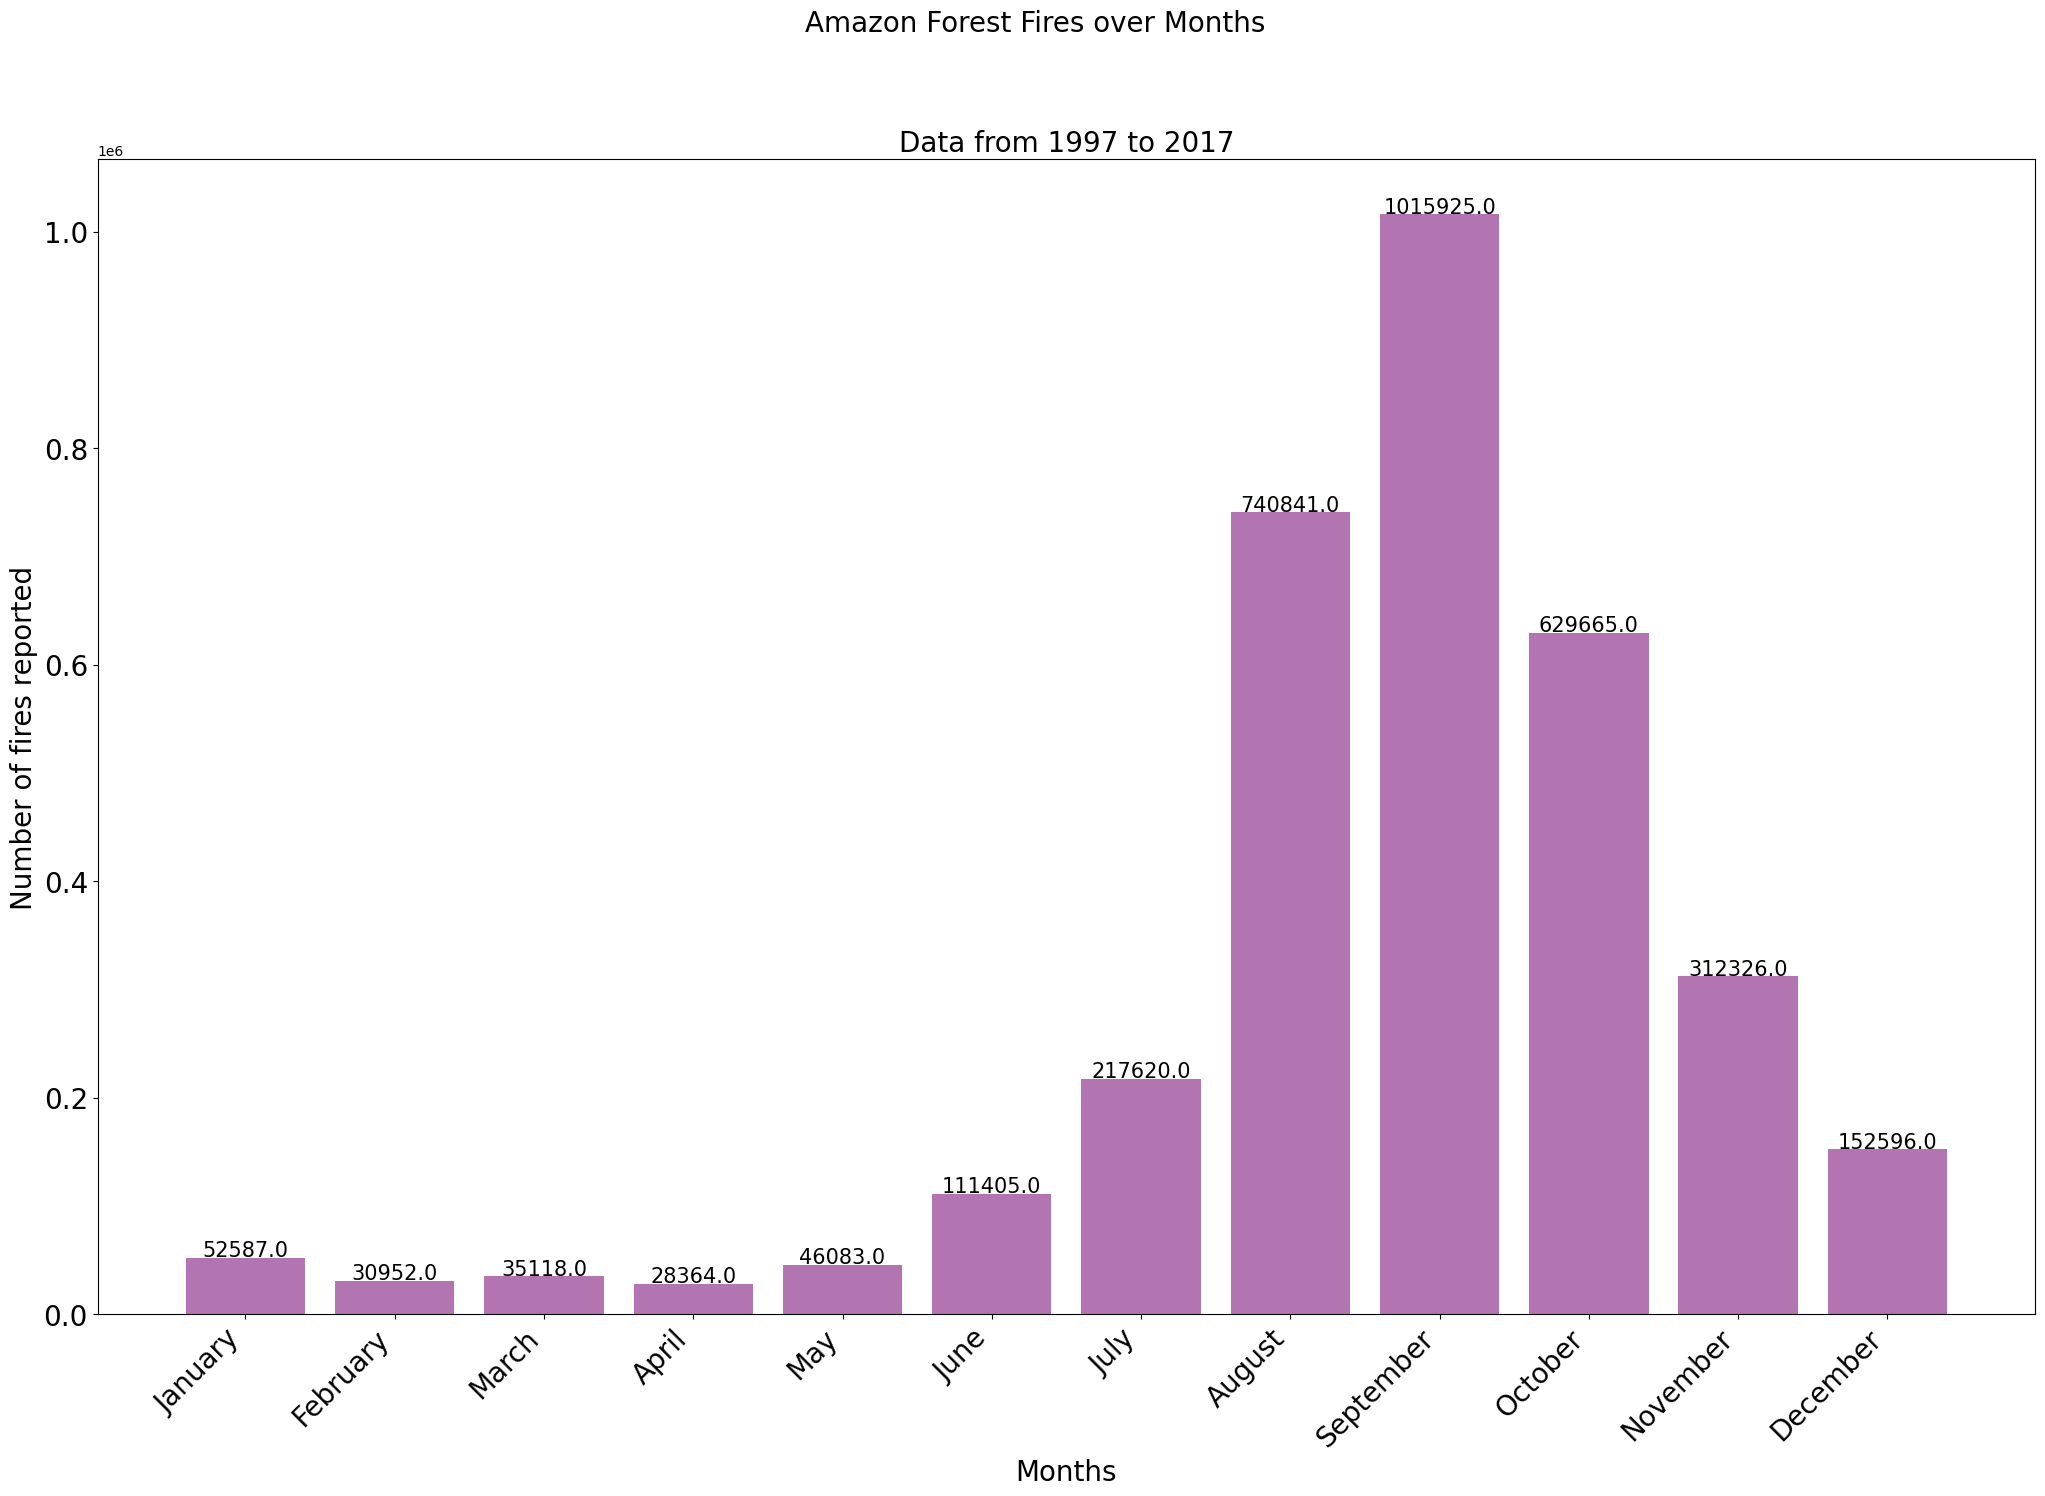

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 15))
plt.bar(
    forest_fire_per_month['month'],  # If months are categorical, this may need adjustments
    forest_fire_per_month['number'],
    color=(0.5, 0.1, 0.5, 0.6)
)
plt.suptitle('Amazon Forest Fires over Months', fontsize=20)
plt.title("Data from 1997 to 2017", fontsize=20)
plt.xlabel('Months', fontsize=20)
plt.ylabel('Number of fires reported', fontsize=20)

# Ensure correct positioning of text labels
for i, num in enumerate(forest_fire_per_month['number']):
    plt.text(
        i,  # Use numerical indices if months are categorical
        num + 1000,
        str(num),  # Convert number to string for display
        ha='center',
        fontsize=15
    )

# Fixing x-axis label formatting
plt.setp(plt.gca().get_xticklabels(),
         rotation=45,
         horizontalalignment='right',
         fontsize=20
)

# Fixing y-axis label formatting
plt.setp(plt.gca().get_yticklabels(), fontsize=20)  # Fixed typo here

plt.show()
